<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69

<Figure size 1000x600 with 0 Axes>

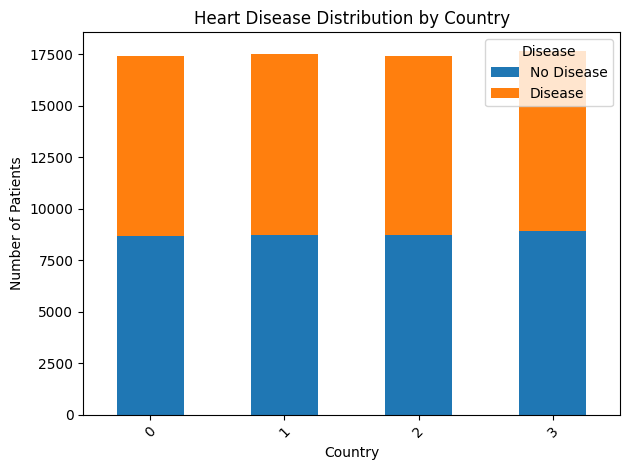

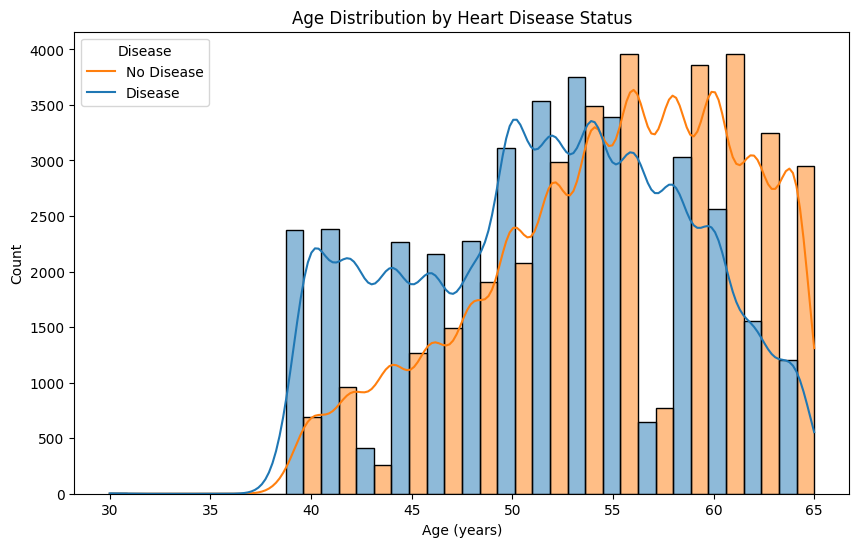

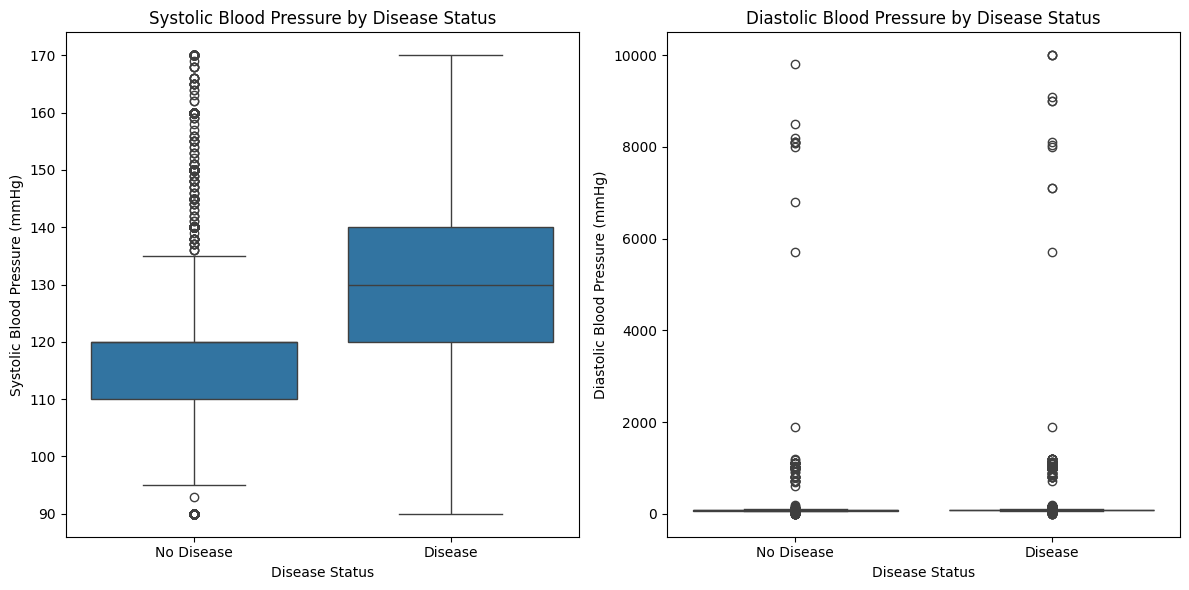

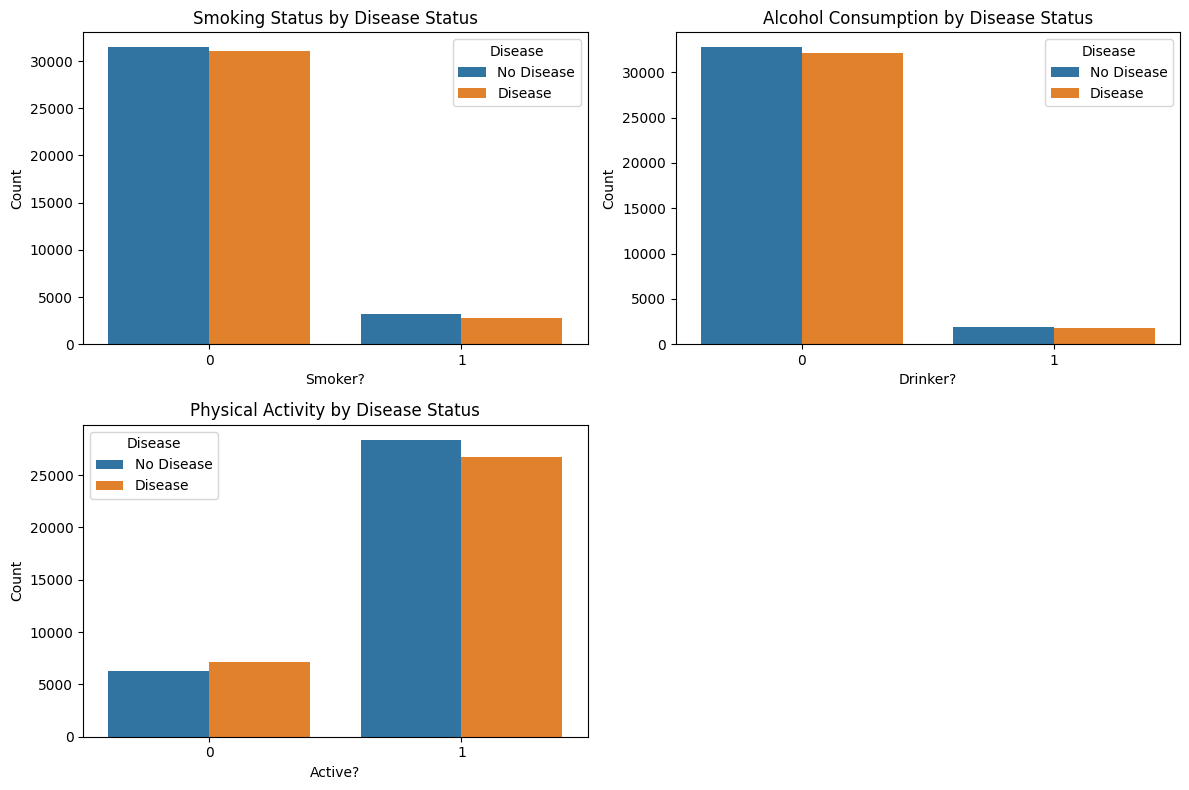

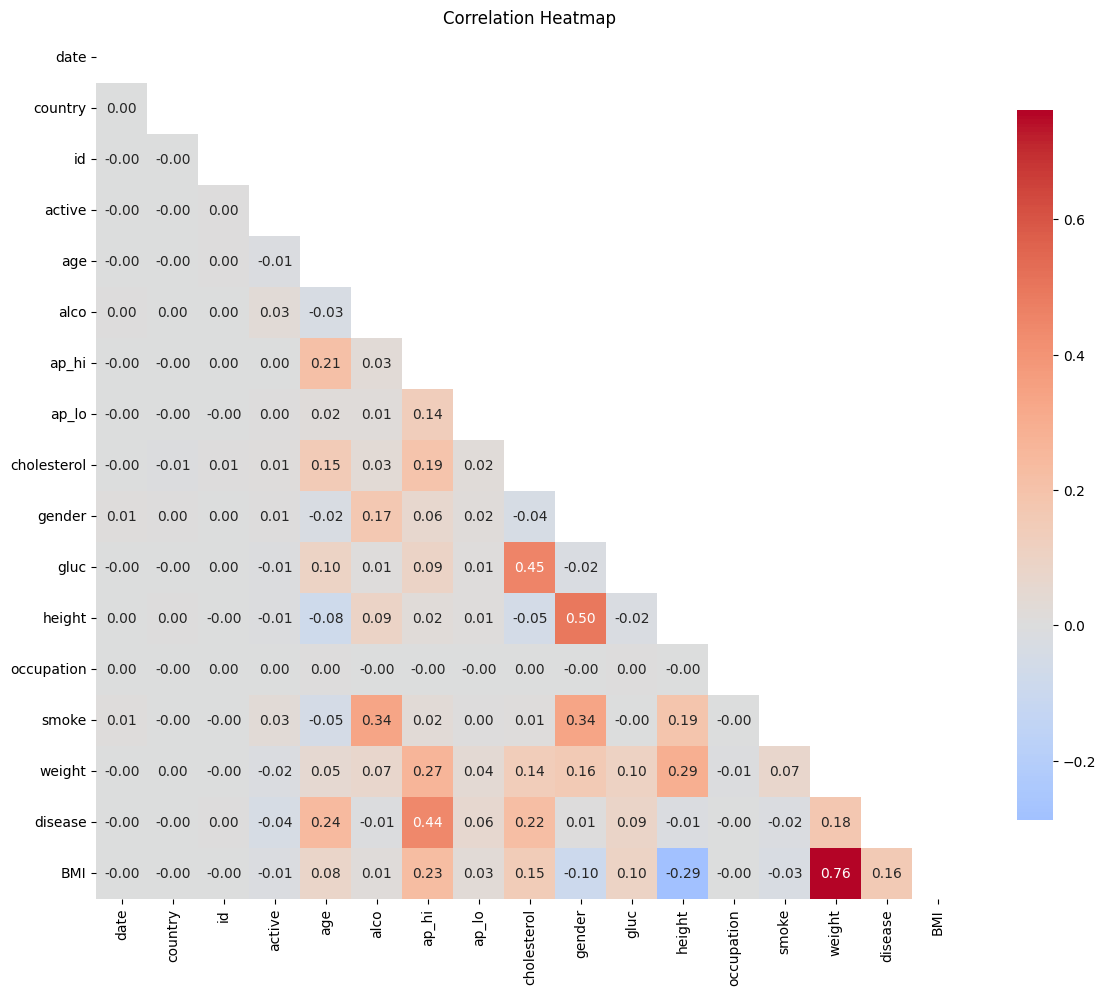

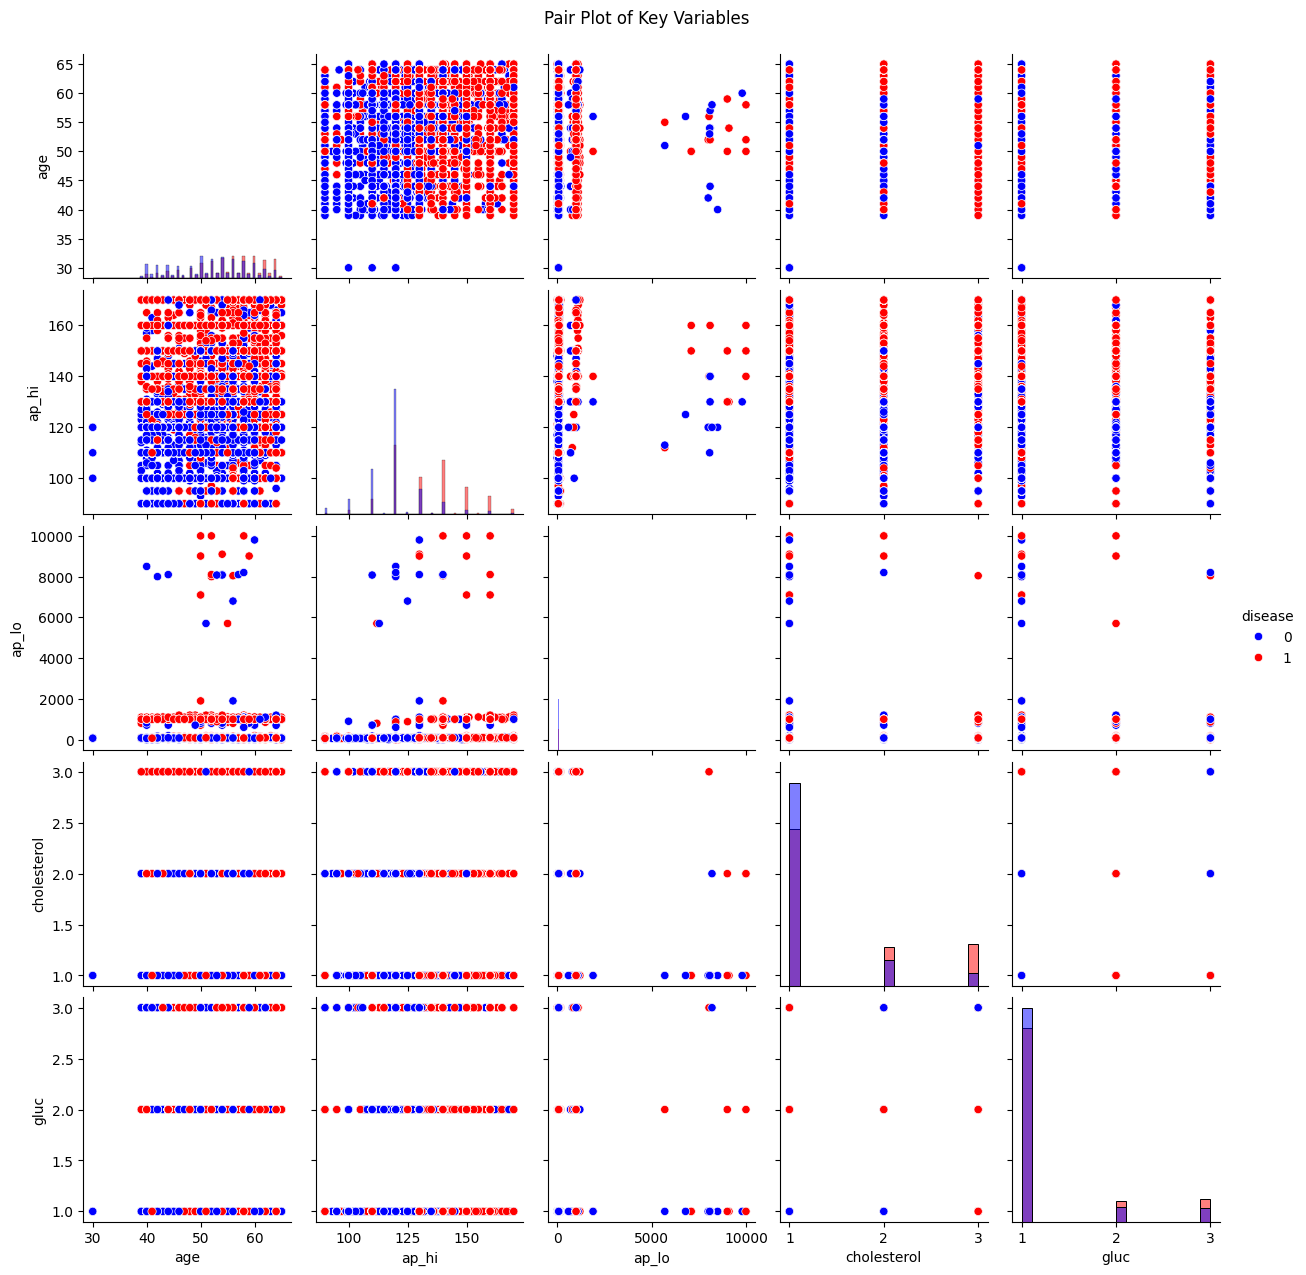

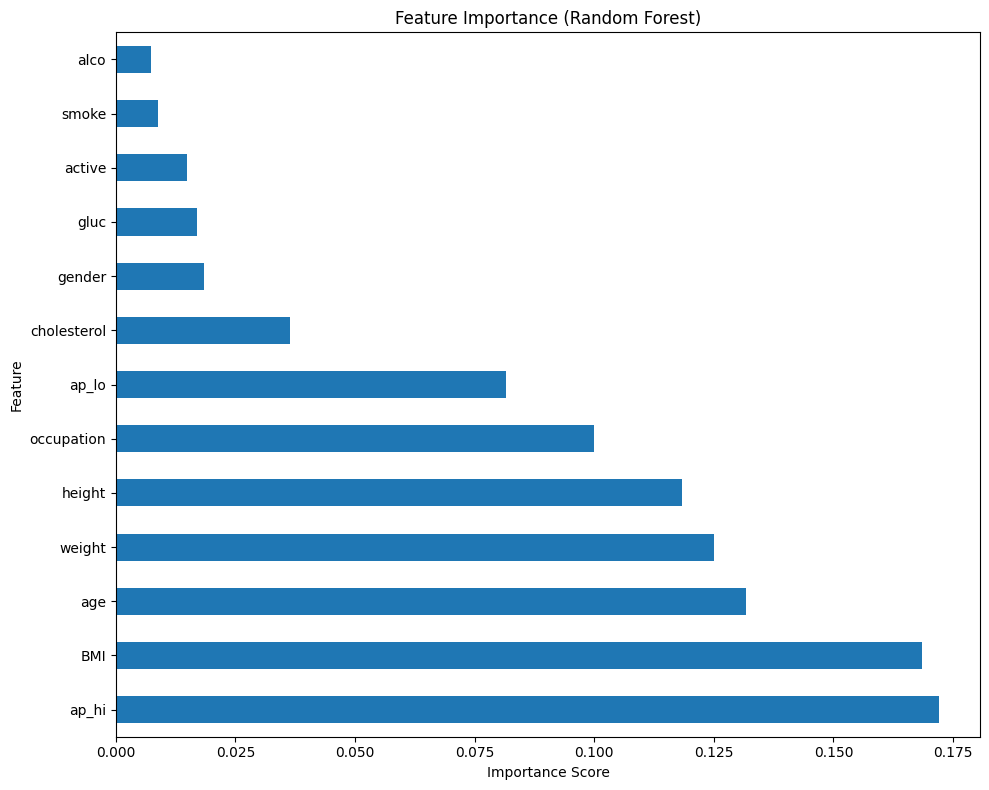

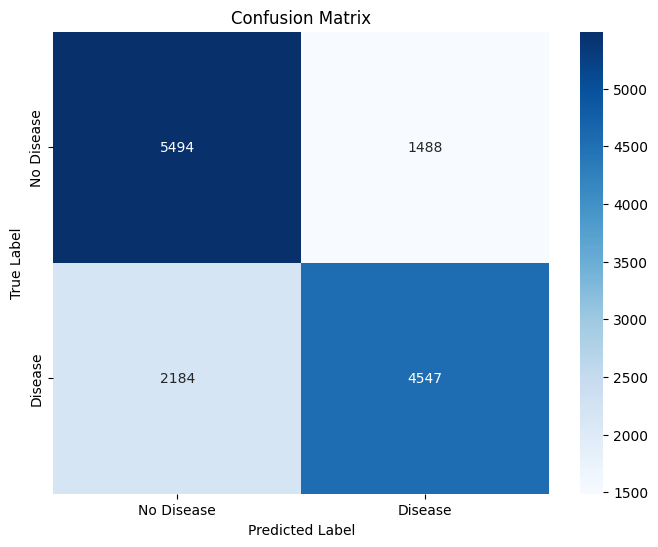

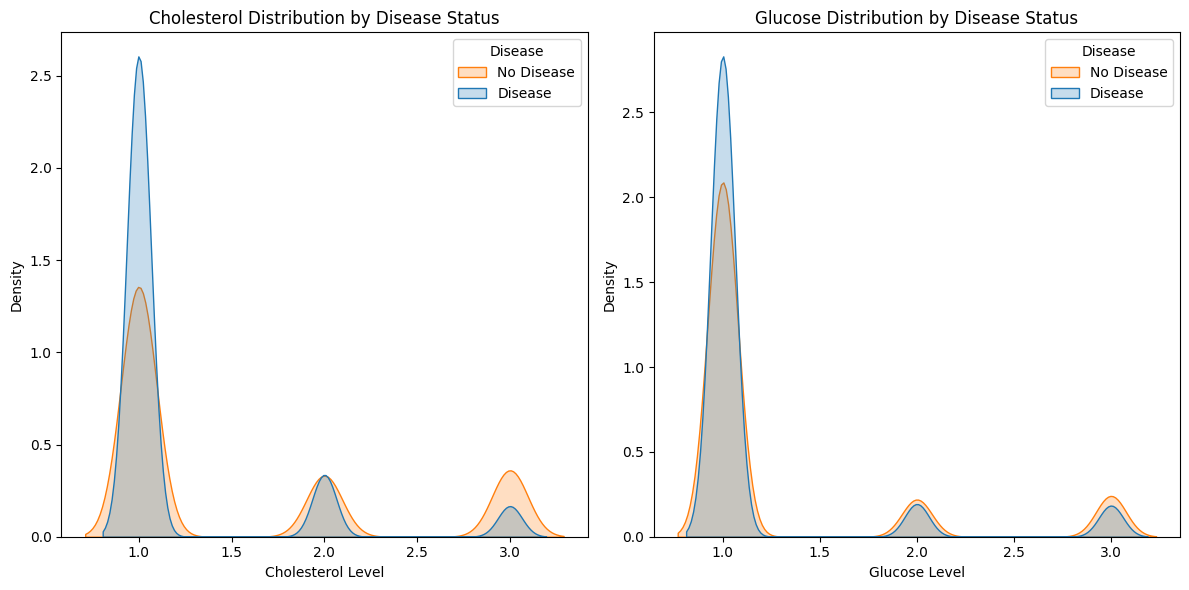

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('cardio_data.csv')

# Display first few rows
data.info()
data.head()

data.describe()

data.info()

# Step 5: Address Data Cleaning Issues
# Based on the information gathered:
# Convert Date Format:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Convert Categorical Variables:
# if data['country'].dtype == 'int64':  # Check if country is encoded
    # le_country = LabelEncoder()
        # Fit the encoder on the original data to get the classes
    # le_country.fit(data['country'])
    # data['country'] = le_country.inverse_transform(data['country'])
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])
data['gender'] = le.fit_transform(data['gender'])
data['occupation'] = le.fit_transform(data['occupation'])
country_disease = data.groupby(['country', 'disease']).size().unstack(fill_value=0)
data['age'] = data['age'].astype(int)
data['weight'] = data['weight'].astype(float)
data['alco'] = data['alco'].astype(int)
data['cholesterol'] = data['cholesterol'].astype(int)

## Check for missing values
print(data.isnull().sum())

# Fill missing values if any
# data.fillna(method='ffill', inplace=True)
data.ffill(inplace=True)

#Convert Age from Days to Years:
data['age'] = (data['age'] / 365).round().astype(int)

# Check data types again
data.info()

# Check statistics again
data.describe()

# Check first few rows again
data.head()

# Feature Engineering (example: BMI)
data['BMI'] = data['weight'] / ((data['height'] / 100) ** 2)

data.head()

# Handle outliers (example for systolic blood pressure)
Q1 = data['ap_hi'].quantile(0.25)
Q3 = data['ap_hi'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['ap_hi'] < (Q1 - 1.5 * IQR)) | (data['ap_hi'] > (Q3 + 1.5 * IQR)))]

# Split the data
X = data.drop(['disease', 'id', 'date', 'country'], axis=1)
y = data['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)


# Model Evaluation
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
gb_clf_pred = gb_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_clf_pred))

print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_clf_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_clf_pred))

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train a model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1. Bar Chart for Categorical Comparison Will be last due to revert country into name
# Compare the number of patients with and without heart disease across different countries.

# Plot
plt.figure(figsize=(10, 6))
country_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Patients')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])
plt.xticks(ticks=range(len(country_disease.index)), labels=country_disease.index, rotation=45)
plt.tight_layout()
plt.show()

#2 Histogram for Age Distribution
# Compare the age distribution of patients with and without heart disease.
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='disease', multiple='dodge', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])
plt.show()

# 3 Box Plot for Blood Pressure Comparison
# Compare systolic and diastolic blood pressure between patients with and without heart disease.
plt.figure(figsize=(12, 6))

# Systolic Blood Pressure
plt.subplot(1, 2, 1)
sns.boxplot(x='disease', y='ap_hi', data=data)
plt.title('Systolic Blood Pressure by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])

# Diastolic Blood Pressure
plt.subplot(1, 2, 2)
sns.boxplot(x='disease', y='ap_lo', data=data)
plt.title('Diastolic Blood Pressure by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

# 4. Count Plot for Lifestyle Factors
# Compare lifestyle factors (e.g., smoking, alcohol consumption, physical activity) between patients with and without heart disease.
plt.figure(figsize=(12, 8))

# Smoking
plt.subplot(2, 2, 1)
sns.countplot(x='smoke', hue='disease', data=data)
plt.title('Smoking Status by Disease Status')
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])

# Alcohol Consumption
plt.subplot(2, 2, 2)
sns.countplot(x='alco', hue='disease', data=data)
plt.title('Alcohol Consumption by Disease Status')
plt.xlabel('Drinker?')
plt.ylabel('Count')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])

# Physical Activity
plt.subplot(2, 2, 3)
sns.countplot(x='active', hue='disease', data=data)
plt.title('Physical Activity by Disease Status')
plt.xlabel('Active?')
plt.ylabel('Count')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

# 5. Heatmap for Correlation Analysis
# Visualize the correlation between different features in your dataset.
# Python
# Copy
# Compute correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 6. Pair Plot for Key Variables
# Compare relationships between key variables for patients with and without heart disease.
# Python
# Copy
# Select key variables
variables = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'disease']
subset = data[variables]

# Pair plot
sns.pairplot(subset, hue='disease', diag_kind='hist', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

# 7. ROC Curve for Model Performance
# Compare the performance of different classification models using ROC curves.
# Python
# Copy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming you've already split your data into X_train, X_test, y_train, y_test

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict_proba(X_test)[:, 1]

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# Train Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict_proba(X_test)[:, 1]

# 8. Feature Importance for Model Interpretation
# Visualize feature importance from a trained model (e.g., Random Forest).
# Python
# Copy
# Assuming you have a trained model (e.g., Random Forest)
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 8))
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 9. Confusion Matrix for Model Evaluation
# Visualize the confusion matrix to understand model performance.
# Python
# Copy
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 10. Distribution Plot for Cholesterol and Glucose
# Compare cholesterol and glucose levels between patients with and without heart disease.
# Python
# Copy
plt.figure(figsize=(12, 6))

# Cholesterol
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x='cholesterol', hue='disease', fill=True)
plt.title('Cholesterol Distribution by Disease Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])

# Glucose
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='gluc', hue='disease', fill=True)
plt.title('Glucose Distribution by Disease Status')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.legend(title='Disease', labels=['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

In [ ]:
#!pip install plotly dash pandas